# Importation des bases

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Data

## Customers 
customers_account_activity = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/account_activity.csv")
customers_customer_data = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/customer_data.csv")

## Fraudulents Patterns
fraud_fraud_indicators = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/fraud_indicators.csv")
fraud_suspicious_activity = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/suspicious_activity.csv")

## Merchant
merchants_merchant_data = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/merchant_data.csv")
merchants_transaction_category_labels = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/transaction_category_labels.csv")

## Transactions Amount
transactions_amount_data = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/amount_data.csv")
transactions_anomaly_scores = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/anomaly_scores.csv")

## Transactions Data
transactions_data_records = pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/transaction_records.csv")
transactions_data_metadata= pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/transaction_metadata.csv")

### Fusion des donnees

In [3]:
df = customers_account_activity
df = df.merge(customers_customer_data, on = "CustomerID")
df = df.merge(transactions_data_records, on = "CustomerID")
df = df.merge(transactions_data_metadata, on = "TransactionID")
df = df.merge(merchants_transaction_category_labels, on = "TransactionID")
df = df.merge(merchants_merchant_data, on = "MerchantID")
df = df.merge(transactions_amount_data, on = "TransactionID")
df = df.merge(transactions_anomaly_scores, on = "TransactionID")
df = df.merge(fraud_suspicious_activity, on = "CustomerID")
df = df.merge(fraud_fraud_indicators, on = "TransactionID")
df.head(4)


,CustomerID,AccountBalance,LastLogin,Name,Age,Address,TransactionID,Amount,Timestamp,MerchantID,Category,MerchantName,Location,TransactionAmount,AnomalyScore,SuspiciousFlag,FraudIndicator
0,1001,9507.272060,2022-01-01,Customer 1001,54,Address 1001,787,33.670626,2022-02-02 18:00:00,2627,Food,Merchant 2627,Location 2627,87.375444,0.030921,0,0
1,1003,1715.321989,2022-01-03,Customer 1003,40,Address 1003,641,30.980239,2022-01-27 16:00:00,2496,Travel,Merchant 2496,Location 2496,46.044172,0.961552,0,0
2,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004,450,11.167088,2022-01-19 17:00:00,2184,Other,Merchant 2184,Location 2184,85.085061,0.525809,0,0
3,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004,921,45.849784,2022-02-08 08:00:00,2111,Other,Merchant 2111,Location 2111,36.534720,0.652188,0,0


### Save the whole dataset

In [4]:
df.to_csv("/home/onyxia/PROJET_STATAPP/Data/Raws/Raw_data.csv", sep = "," )

# Nettoyage du dataset

## Valeurs manquantes

In [5]:
import missingno as msno

<Axes: >

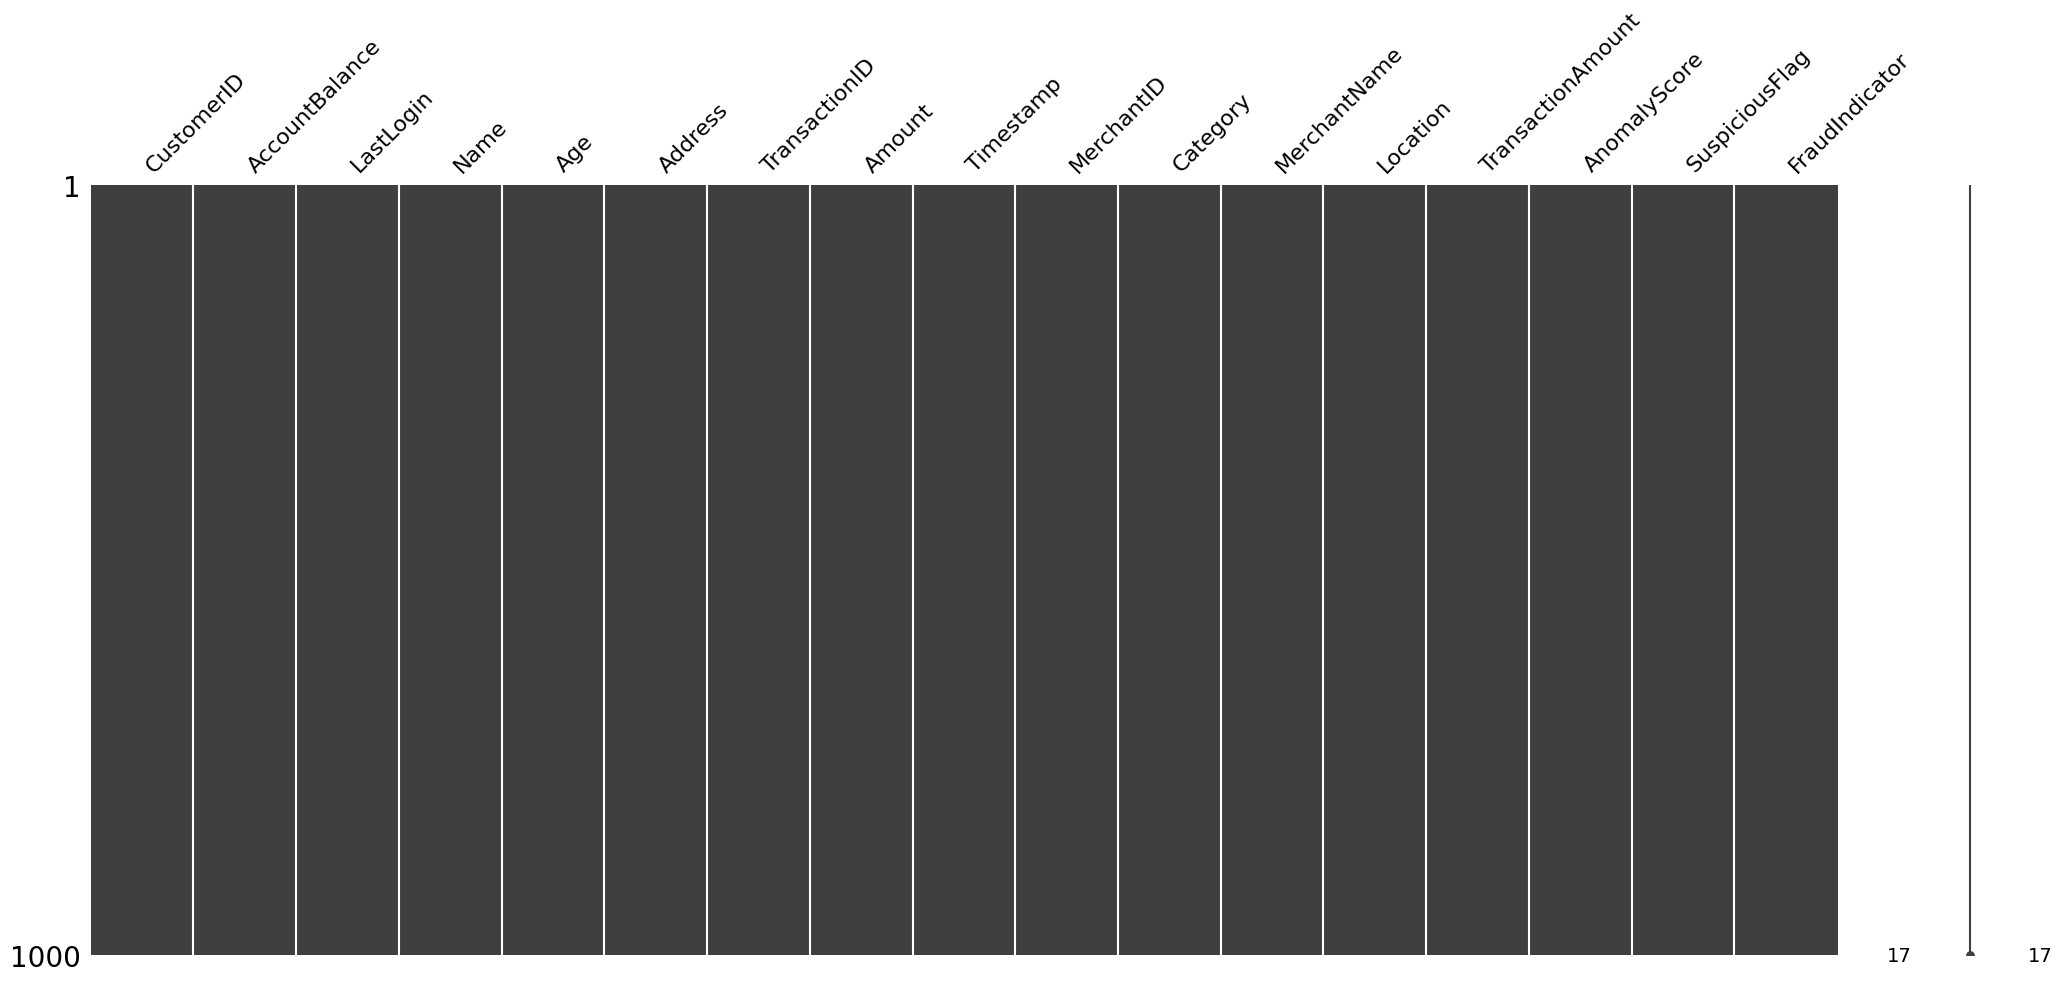

In [6]:
msno.matrix(df)

Aucune valeur manquante apparente

## Valeurs aberantes

In [7]:
df = df.drop(columns = ["TransactionID", "CustomerID", "MerchantID", "Address"]).reset_index(drop = True)

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Jour'] = df['Timestamp'].dt.day_name()      # nom du jour : Monday, Tuesday, etc.
df['Mois'] = df['Timestamp'].dt.month_name()    # nom du mois : January, February, etc.
df['Heure'] = df['Timestamp'].dt.hour

In [18]:
colonnes_cat = ["Category", "Jour", "Mois", "Heure"]
colonnes_num = df.select_dtypes(include='number').columns.tolist()

In [23]:
colonnes_num

['AccountBalance',
 'Age',
 'Amount',
 'TransactionAmount',
 'AnomalyScore',
 'SuspiciousFlag',
 'FraudIndicator',
 'Heure']

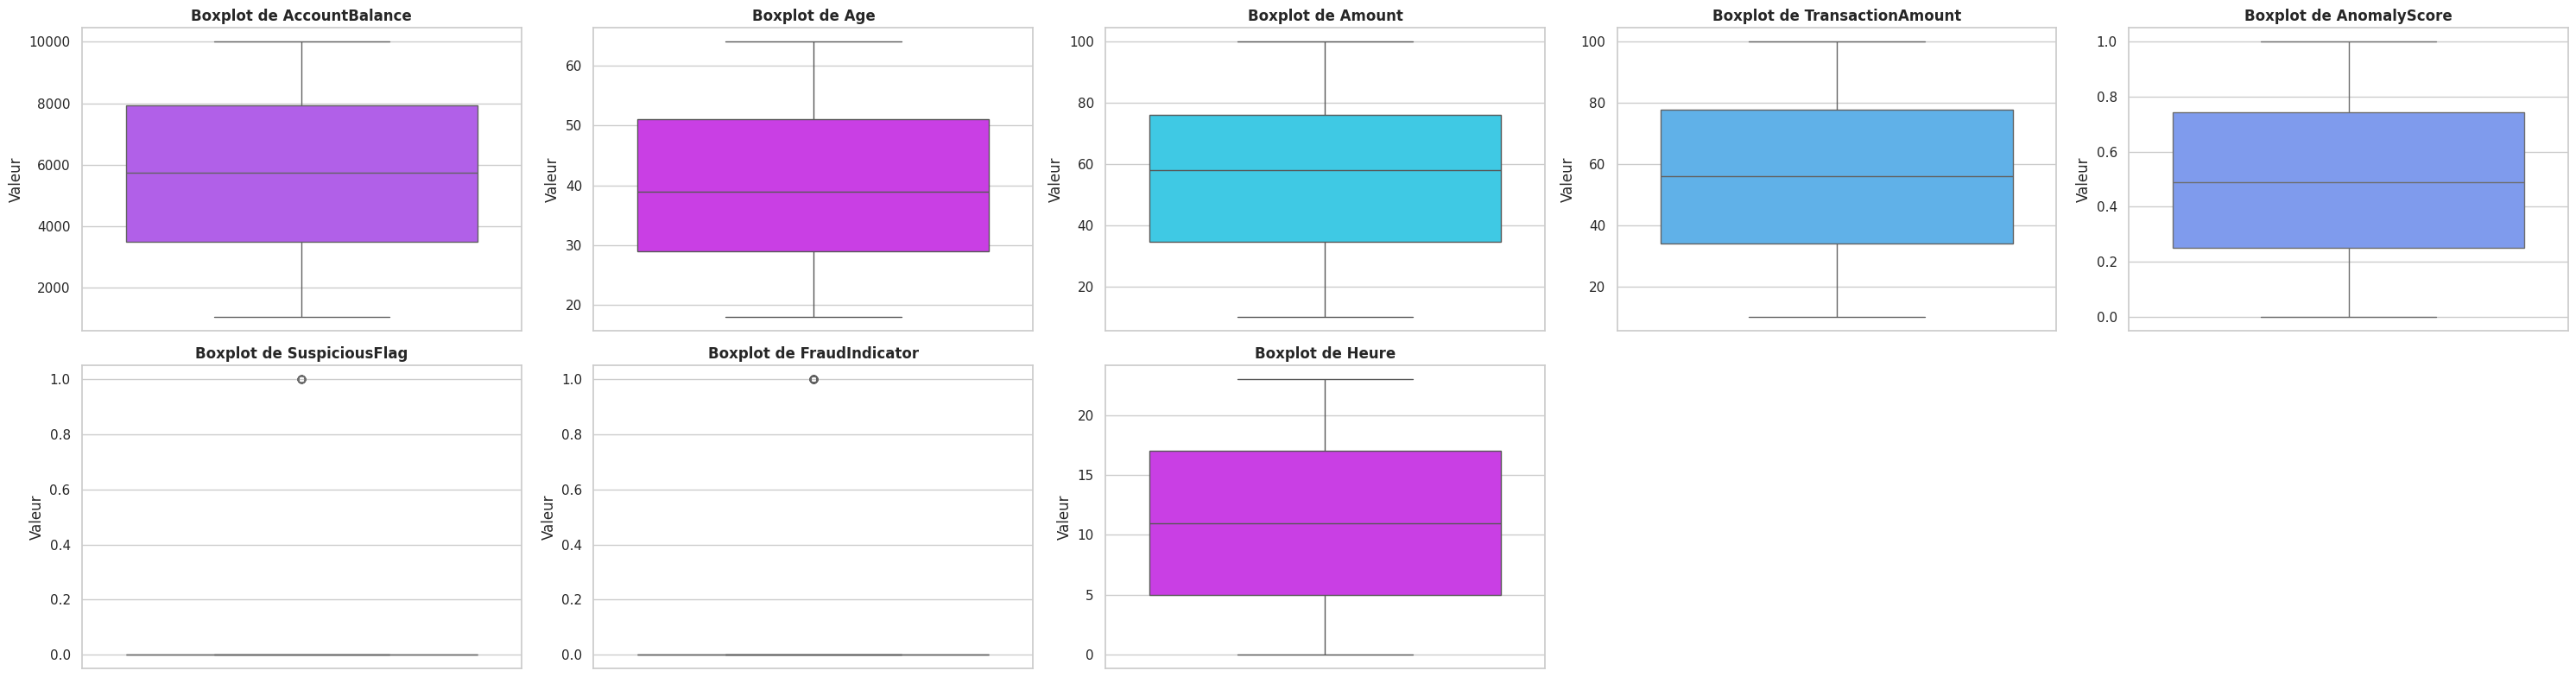

In [25]:
n = len(colonnes_num)
cols = 5
rows = math.ceil(n / cols)

plt.figure(figsize=(6 * cols, 4 * rows))
sns.set_theme(style="whitegrid")

for i, col in enumerate(colonnes_num, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color=sns.color_palette("cool")[i-3 % 10])
    plt.title(f'Boxplot de {col}', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.ylabel('Valeur')

plt.tight_layout()
plt.show()

Aucun outlier apparent

# Statistiques descriptives preliminaires des variables 

In [26]:
df.describe()

,AccountBalance,Age,Amount,Timestamp,TransactionAmount,AnomalyScore,SuspiciousFlag,FraudIndicator,Heure
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5715.455931,39.848000,55.394871,2022-01-21 19:30:00,55.853826,0.492282,0.025000,0.045000,11.436000
min,1056.301181,18.000000,10.006933,2022-01-01 00:00:00,10.057864,0.000234,0.000000,0.000000,0.000000
25%,3489.554711,29.000000,34.502315,2022-01-11 09:45:00,33.875129,0.251802,0.000000,0.000000,5.000000
50%,5753.007775,39.000000,57.844325,2022-01-21 19:30:00,55.958313,0.490242,0.000000,0.000000,11.000000
75%,7925.710167,51.000000,75.858576,2022-02-01 05:15:00,77.589391,0.741888,0.000000,0.000000,17.000000
max,9999.776239,64.000000,99.887410,2022-02-11 15:00:00,99.784323,0.999047,1.000000,1.000000,23.000000
std,2540.517262,13.074932,25.070809,NaN,26.093606,0.288423,0.156203,0.207408,6.913009


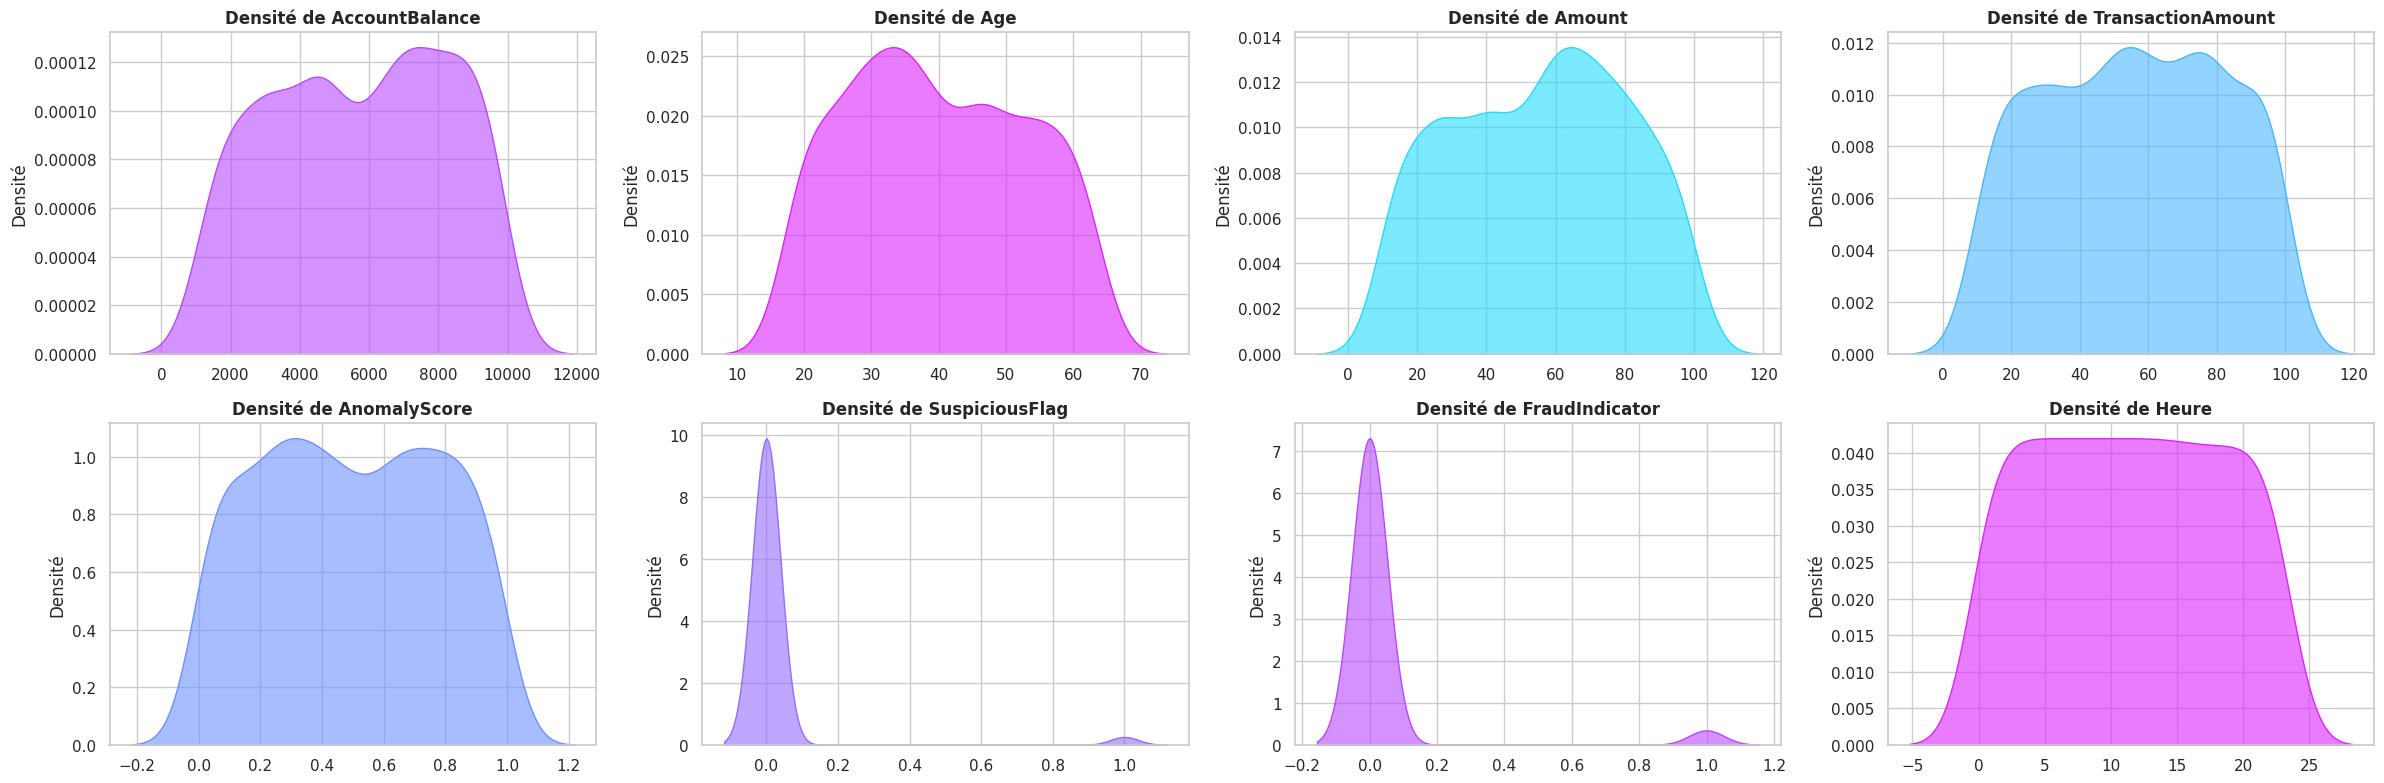

In [28]:
n_num = len(colonnes_num)
cols = 4
rows = math.ceil(n_num / cols)

plt.figure(figsize=(6 * cols, 4 * rows))
for i, col in enumerate(colonnes_num, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=df, x=col, fill=True, color=sns.color_palette("cool")[i-3 % 10], alpha=0.6)
    plt.title(f'Densité de {col}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Densité')

plt.tight_layout()
plt.show()

/tmp/ipykernel_190975/2776610167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")
/tmp/ipykernel_190975/2776610167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")
/tmp/ipykernel_190975/2776610167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")
/tmp/ipykernel_190975/2776610167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

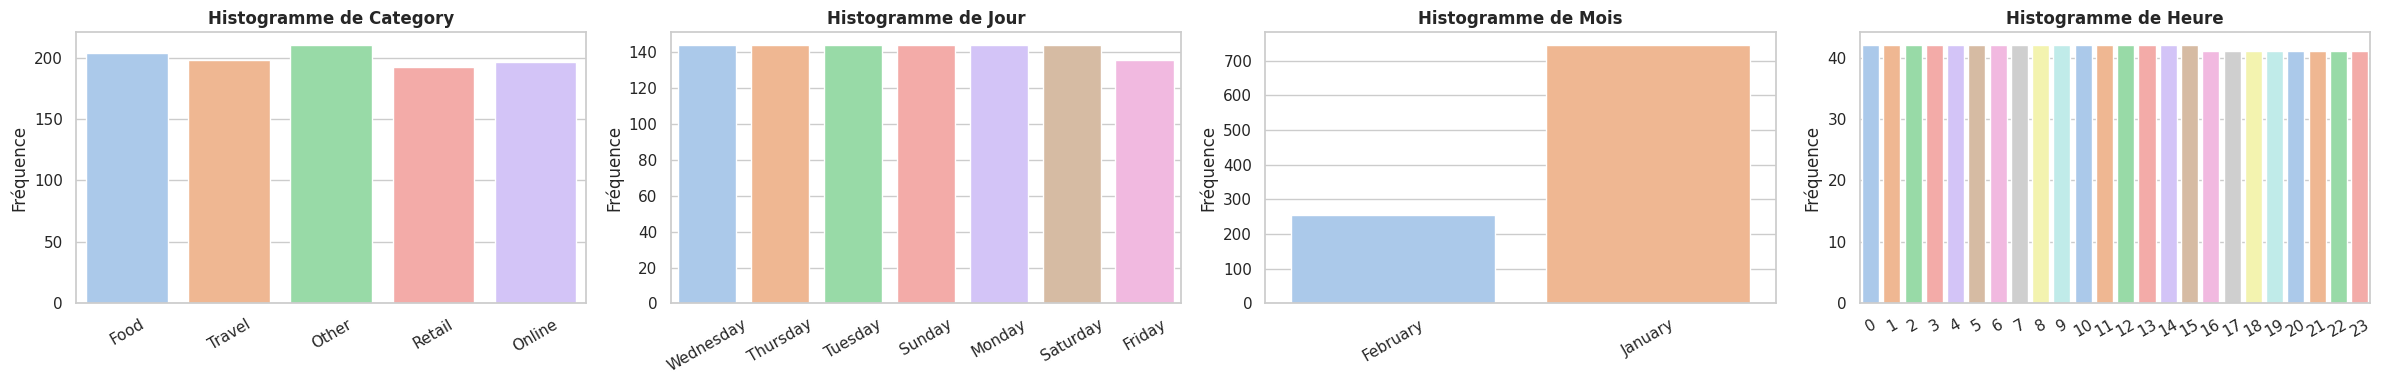

In [29]:
n_cat = len(colonnes_cat)
rows = math.ceil(n_cat / cols)

plt.figure(figsize=(6 * cols, 4 * rows))
for i, col in enumerate(colonnes_cat, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f'Histogramme de {col}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# Separation des donnees

In [31]:
Y = df["FraudIndicator"]
df = df.drop(columns = "FraudIndicator")
X = df
X.head(4)

,AccountBalance,LastLogin,Name,Age,Amount,Timestamp,Category,MerchantName,Location,TransactionAmount,AnomalyScore,SuspiciousFlag,Jour,Mois,Heure
0,9507.272060,2022-01-01,Customer 1001,54,33.670626,2022-02-02 18:00:00,Food,Merchant 2627,Location 2627,87.375444,0.030921,0,Wednesday,February,18
1,1715.321989,2022-01-03,Customer 1003,40,30.980239,2022-01-27 16:00:00,Travel,Merchant 2496,Location 2496,46.044172,0.961552,0,Thursday,January,16
2,3101.509134,2022-01-04,Customer 1004,30,11.167088,2022-01-19 17:00:00,Other,Merchant 2184,Location 2184,85.085061,0.525809,0,Wednesday,January,17
3,3101.509134,2022-01-04,Customer 1004,30,45.849784,2022-02-08 08:00:00,Other,Merchant 2111,Location 2111,36.534720,0.652188,0,Tuesday,February,8
